## DESCRIPCIÓN DEL PROBLEMA A RESOVER 
 
Estrategia  de  Campaña  Telefónica  para  Depósitos  a  Plazo  Fijo  en  el 
Contexto Bancario

#### Introducción: 
 
En el dinámico mundo bancario, los depósitos a plazo fijo son esenciales 
tanto  para  los  clientes  como  para  las  entidades  bancarias.  Estos  productos 
financieros  ofrecen  estabilidad  y  rentabilidad.  Sin  embargo,  las  entidades 
bancarias se enfrentan al desafío de identificar clientes potenciales y optimizar 
sus recursos para llevar a cabo campañas telefónicas efectivas

#### Objetivos: 
 
Realizar un análisis exploratorio detallado sobre los diferentes tipos de 
clientes presentes en el conjunto de datos. 
Desarrollar un modelo predictivo para identificar qué clientes tienen más 
probabilidad de contratar un depósito a plazo fijo. 
Explicar los resultados obtenidos y proporcionar recomendaciones para 
mejorar la eficacia de futuras campañas.

#### Desarrollo del Caso: 
 
- Parte 1 (Análisis Exploratorio de Clientes)

- Parte 2 (Modelo Predictivo)

- Parte 3 (Explicación de Resultados)

### Librerias

In [26]:
import pandas as pd
import matplotlib.pyplot as plt



### Cargamos la Data (Train)
- Se crea una copia de la data para no 'machacar' la data original.

In [27]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [28]:
df

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,NaN,192,16-may-2021,1,-1,0,NaN,no
1,2,47,services,soltero,secundaria/superiores,no,3644,no,no,NaN,83,9-jun-2021,2,-1,0,NaN,no
2,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,NaN,no
3,4,42,management,casado,universitarios,no,1773,no,no,movil,311,9-apr-2021,1,336,1,sin_exito,no
4,5,56,management,casado,universitarios,no,217,no,si,movil,121,21-jul-2021,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,44252,38,management,casado,secundaria/superiores,no,-323,si,no,NaN,250,9-jun-2021,1,-1,0,NaN,no
44252,44253,49,technician,casado,secundaria/superiores,no,1982,si,si,movil,73,22-aug-2021,15,-1,0,NaN,no
44253,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,24-jul-2021,1,-1,0,NaN,no
44254,44255,29,blue-collar,soltero,universitarios,no,98,no,no,movil,170,10-aug-2021,2,-1,0,NaN,no


### Exploratory Data Analysis

In [29]:
df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                         1810
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12730
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    36163
target                               0
dtype: int64

### Preguntas interesantes

- Aqui apuntamos todas las preguntas que se os vengan a la cabeza (como un brainstorm) y hay que poner la pregunta y la respuesta que encontreis.
- Contrarrestamos la info para que sea 100% veridica.

1. ¿Cuantas personas hay con mas de 25.000 euros en la cuenta?

In [30]:
df_sin_contracto =df[df['tipo_contacto'].isnull()]
num =df_sin_contracto[df_sin_contracto['saldo'] >=1000]
len(num)

3745

In [31]:
(len(num) / len(df_sin_contracto)) * 100

29.418695993715634

In [32]:
len(df[df['saldo']>25000])

97

2. ¿Cuantas personas hay menores de 18 años?

In [33]:
df_18 = df[df['edad'] <= 18]
df_18.value_counts()

ID     edad  trabajo  estado_civil  educacion              deuda  saldo  vivienda  prestamo  tipo_contacto  duracion  fecha_contacto  campaign  tiempo_transcurrido  contactos_anteriores  resultado_campanas_anteriores  target
5649   18    student  soltero       priamaria              no     608    no        no        movil          210       13-nov-2021     1         93                   1                     exito                          si        1
37688  18    student  soltero       secundaria/superiores  no     156    no        no        movil          298       4-nov-2021      2         82                   4                     otro                           no        1
Name: count, dtype: int64

3. ¿Cuantas personas tienen vivienda?

In [34]:
personas_con_mas_de = (df[df['saldo']>25000])
personas_con_mas_de['deuda'].value_counts()

deuda
no    97
Name: count, dtype: int64

In [35]:
num_persona_con_vivienda =df[df['vivienda'] == 'si'].shape[0]

In [36]:
per_viv = num_persona_con_vivienda / df.shape[0] * 100
print(f'Hay {per_viv} personas con vivienda')

Hay 55.6015003615329 personas con vivienda


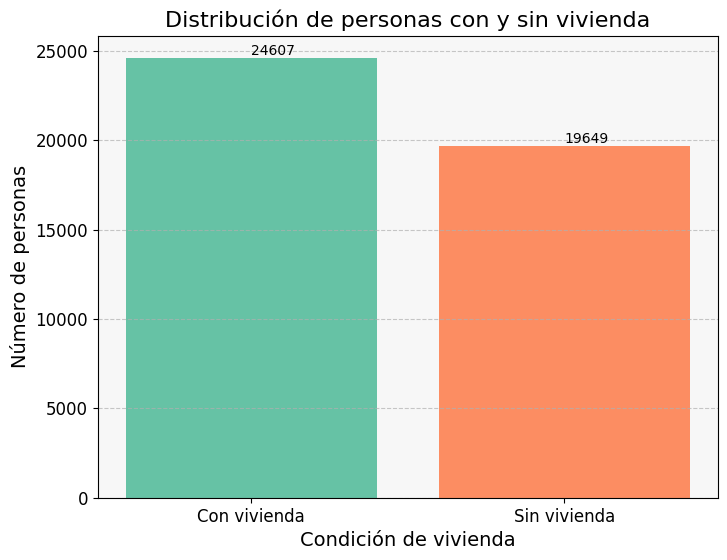

In [37]:
num_persona_con_vivienda = df[df['vivienda'] == 'si'].shape[0]
num_persona_sin_vivienda = df[df['vivienda'] == 'no'].shape[0]

# Datos para el gráfico
labels = ['Con vivienda', 'Sin vivienda']
datos = [num_persona_con_vivienda, num_persona_sin_vivienda]
colors = ['#66c2a5', '#fc8d62']  # Colores más llamativos

# Crear el gráfico de barras con un estilo más bonito
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico
bars = plt.bar(labels, datos, color=colors)

# Agregar etiquetas en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), va='bottom')

plt.title('Distribución de personas con y sin vivienda', fontsize=16)
plt.xlabel('Condición de vivienda', fontsize=14)
plt.ylabel('Número de personas', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla para mejor visualización

# Personalizar el fondo del gráfico
plt.gca().set_facecolor('#f7f7f7')

plt.show()

4. ¿Cuantas personas con vivienda no tienen deuda?

In [38]:
personas_con_mas_de = (df[df['saldo']>25000])
personas_con_mas_de['deuda'].value_counts()
df_vivienda_si =df[df['vivienda'] == 'si']
num_persona_con_vivienda =df[df['vivienda'] == 'si'].shape[0]

df_vivienda_si[df_vivienda_si['deuda'] == 'si']

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
466,467,37,management,soltero,universitarios,si,45,si,no,NaN,204,7-may-2021,1,-1,0,NaN,no
566,567,21,blue-collar,soltero,secundaria/superiores,si,-59,si,si,NaN,83,4-jun-2021,1,-1,0,NaN,no
1221,1222,45,admin.,casado,secundaria/superiores,si,-106,si,si,movil,553,7-may-2021,3,288,1,otro,si
1527,1528,47,blue-collar,casado,priamaria,si,-1385,si,si,NaN,77,15-may-2021,1,-1,0,NaN,no
1614,1615,49,entrepreneur,divorciado,NaN,si,-701,si,no,movil,988,30-jul-2021,2,-1,0,NaN,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43764,43765,49,management,divorciado,universitarios,si,0,si,no,NaN,345,12-may-2021,2,-1,0,NaN,no
43773,43774,47,technician,casado,universitarios,si,-813,si,si,NaN,179,16-jun-2021,25,-1,0,NaN,no
43852,43853,29,blue-collar,soltero,secundaria/superiores,si,-580,si,no,NaN,123,23-jun-2021,2,-1,0,NaN,no
43975,43976,30,services,soltero,secundaria/superiores,si,-366,si,no,movil,516,18-jul-2021,1,-1,0,NaN,si


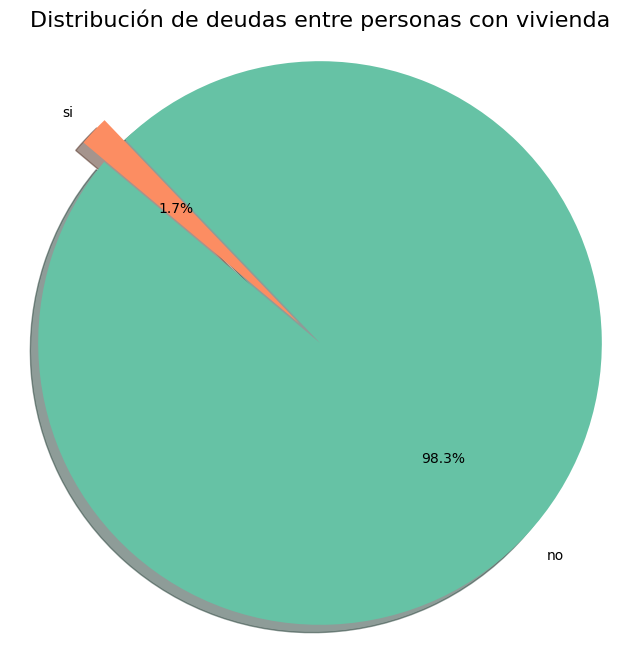

In [39]:
df_vivienda_si = df[df['vivienda'] == 'si']

# Contar el número de personas con y sin deuda
deudas_vivienda_si = df_vivienda_si['deuda'].value_counts()

# Configuración de colores y estilos
colors = ['#66c2a5', '#fc8d62']  # Colores más agradables
explode = (0.1, 0)  # Destacar la porción "Tiene deuda"

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))  # Ajustar el tamaño del gráfico
plt.pie(deudas_vivienda_si, labels=deudas_vivienda_si.index, autopct='%1.1f%%', colors=colors, explode=explode,
        shadow=True, startangle=140)

# Personalizar el gráfico
plt.title('Distribución de deudas entre personas con vivienda', fontsize=16)
plt.axis('equal')  # Hacer que el gráfico de torta sea un círculo

# Mostrar el gráfico
plt.show()

5. ¿Cual es la edad promedio de las personas SIN deuda y CON vivienda propia? 

In [40]:
# Filtrar personas que no tienen deuda y tienen vivienda
personas_sin_deuda_y_con_vivienda = df[(df['deuda'] == 'no') & (df['vivienda'] == 'si')]

# Calcular la edad promedio
edad_promedio = personas_sin_deuda_y_con_vivienda['edad'].mean()

print("La edad promedio de las personas que no tienen deuda y tienen vivienda es:", round(edad_promedio, 2))

La edad promedio de las personas que no tienen deuda y tienen vivienda es: 39.2


6. ¿Cual es la mediana de la edades de las personas SIN deuda y CON vivienda propia?

In [41]:
# Calcular la mediana de las edades
mediana_edades = personas_sin_deuda_y_con_vivienda['edad'].median()

print("La mediana de las edades de las personas que no tienen deuda y tienen vivienda es:", mediana_edades)

La mediana de las edades de las personas que no tienen deuda y tienen vivienda es: 38.0


7. ¿Cual es la media de edades de las personas según su estado civil?

C:\Users\GerardSetóTarragó\AppData\Local\Temp\ipykernel_13860\2930685824.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index, value + 0.5, f'{porcentajes_por_estado_civil[index]:.1f}%', ha='center', fontsize=10)


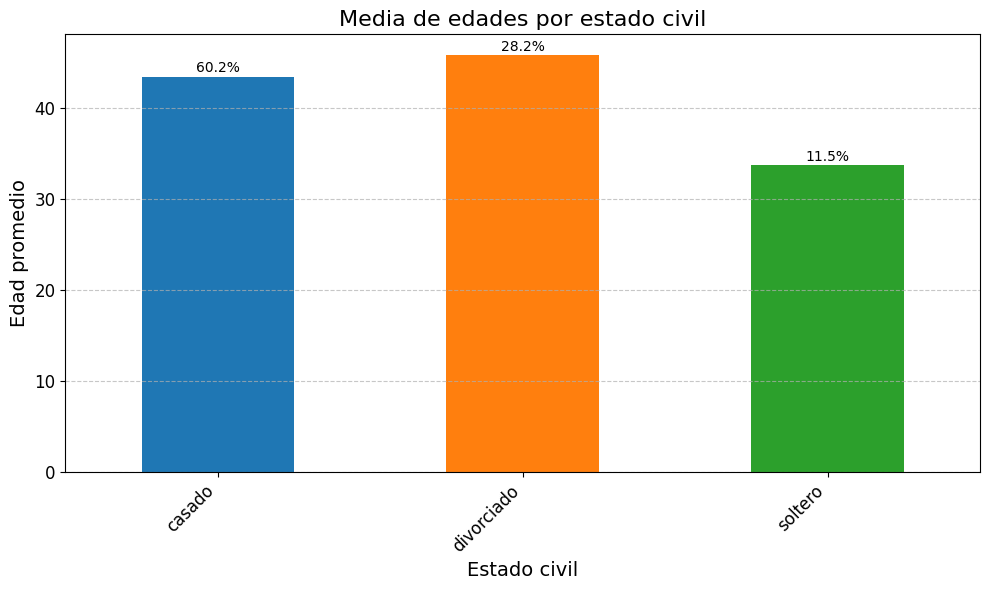

In [42]:
media_edades_por_estado_civil = df.groupby('estado_civil')['edad'].mean()

# Calcula el total de personas en el DataFrame
total_personas = len(df)

# Calcula la cantidad de personas por estado civil
cantidad_por_estado_civil = df['estado_civil'].value_counts()

# Calcula los porcentajes de cada grupo
porcentajes_por_estado_civil = (cantidad_por_estado_civil / total_personas) * 100

# Crear el gráfico de barras
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
media_edades_por_estado_civil.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Personalizar el gráfico
plt.title('Media de edades por estado civil', fontsize=16)
plt.xlabel('Estado civil', fontsize=14)
plt.ylabel('Edad promedio', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotar etiquetas para mejor visualización
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla para mejor visualización

# Agregar los porcentajes en cada barra
for index, value in enumerate(media_edades_por_estado_civil):
    plt.text(index, value + 0.5, f'{porcentajes_por_estado_civil[index]:.1f}%', ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

8. ¿Cuantas personas NO tienen deuda, SI tienen vivienda y NO tienen prestamos?

In [43]:
personas_sin_deuda_y_con_vivienda_sin_prestamo = df[(df['deuda'] == 'no') & (df['vivienda'] == 'si') & (df['prestamo'] == 'no')]

# Contar el número de personas que cumplen con las condiciones
num_personas = len(personas_sin_deuda_y_con_vivienda_sin_prestamo)

# Mostrar la cantidad de personas en un DataFrame
dataframe_personas = personas_sin_deuda_y_con_vivienda_sin_prestamo.reset_index(drop=True)  # Reiniciar el índice
print("Cantidad de personas: ", num_personas," con vivienda, sin prestamo y sin deuda.")
print("\nDataFrame con las personas:")
dataframe_personas

Cantidad de personas:  20033  con vivienda, sin prestamo y sin deuda.

DataFrame con las personas:


,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,NaN,192,16-may-2021,1,-1,0,NaN,no
1,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,NaN,no
2,9,30,blue-collar,soltero,secundaria/superiores,no,3,si,no,movil,51,25-jul-2021,1,-1,0,NaN,no
3,12,48,blue-collar,divorciado,secundaria/superiores,no,65,si,no,movil,146,14-may-2021,1,370,1,sin_exito,no
4,14,31,management,divorciado,universitarios,no,883,si,no,movil,112,5-mar-2021,2,106,1,sin_exito,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20028,44247,29,services,soltero,secundaria/superiores,no,498,si,no,NaN,177,3-jun-2021,26,-1,0,NaN,no
20029,44249,30,blue-collar,casado,priamaria,no,597,si,no,NaN,190,23-may-2021,1,-1,0,NaN,no
20030,44252,38,management,casado,secundaria/superiores,no,-323,si,no,NaN,250,9-jun-2021,1,-1,0,NaN,no
20031,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,24-jul-2021,1,-1,0,NaN,no


In [44]:
# Calcular el saldo promedio de las personas que cumplen con las condiciones
saldo_promedio = personas_sin_deuda_y_con_vivienda_sin_prestamo['saldo'].mean().round(2)

print("El saldo promedio de las personas que cumplen con las condiciones es:", saldo_promedio)


El saldo promedio de las personas que cumplen con las condiciones es: 1274.91


In [45]:
# Calcular la mediana del saldo de las personas que cumplen con las condiciones
saldo_mediana = personas_sin_deuda_y_con_vivienda_sin_prestamo['saldo'].median()

print("La mediana del saldo de las personas que cumplen con las condiciones es:", saldo_mediana)


La mediana del saldo de las personas que cumplen con las condiciones es: 456.0


9. ¿Cuál es el número de personas por estado cívil con las condiciones anteriores(con vivienda, sin prestamos y sin deudas)?

C:\Users\GerardSetóTarragó\AppData\Local\Temp\ipykernel_13860\3719354786.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index, value + 0.5, f'{porcentajes_por_tipo_de_estudios[index]:.1f}%', ha='center', fontsize=10)


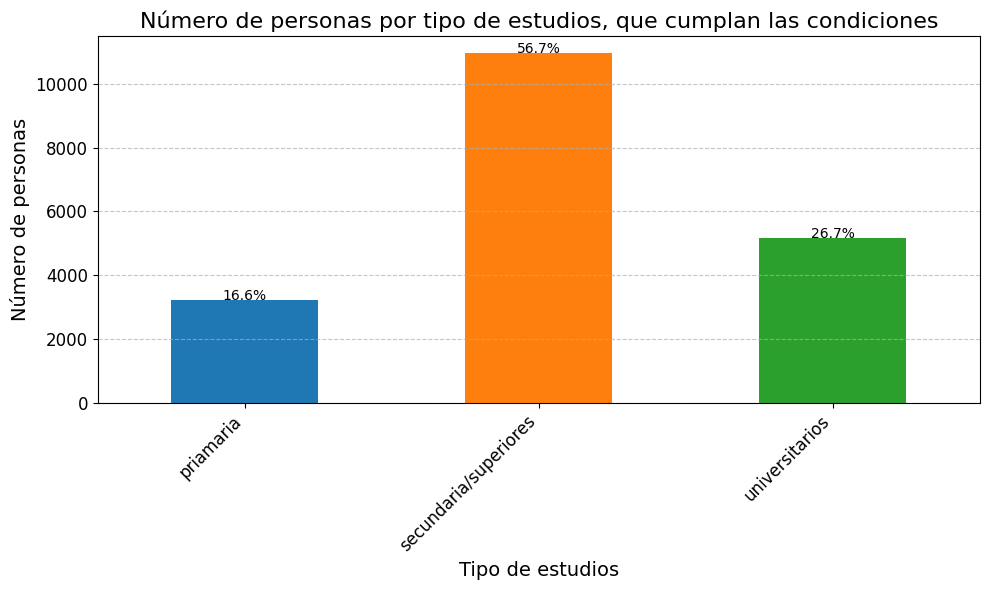

In [63]:
# Agrupar por tipo de estudios y contar el número de personas en cada categoría
personas_por_tipo_de_estudios = personas_sin_deuda_y_con_vivienda_sin_prestamo.groupby('educacion').size()

# Calcular el total de personas
total_personas = personas_por_tipo_de_estudios.sum()

# Calcular los porcentajes de cada grupo
porcentajes_por_tipo_de_estudios = (personas_por_tipo_de_estudios / total_personas) * 100

# Configuración de colores y estilo
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
personas_por_tipo_de_estudios.plot(kind='bar', color=colors)

# Personalizar el gráfico
plt.title('Número de personas por tipo de estudios, que cumplan las condiciones', fontsize=16)
plt.xlabel('Tipo de estudios', fontsize=14)
plt.ylabel('Número de personas', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotar etiquetas para mejor visualización
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla para mejor visualización

# Agregar los porcentajes en cada barra
for index, value in enumerate(personas_por_tipo_de_estudios):
    plt.text(index, value + 0.5, f'{porcentajes_por_tipo_de_estudios[index]:.1f}%', ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()


## Proporción de viviendas con y sin préstamo

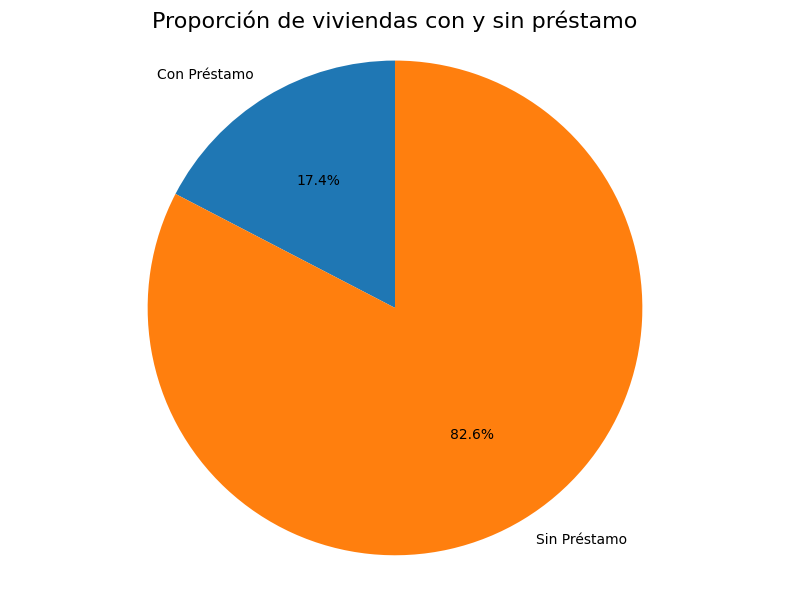

In [64]:
# Contar el número total de viviendas
total_viviendas = len(df)

# Contar el número de viviendas con y sin préstamo
viviendas_con_prestamo = df[df['prestamo'] == 'si']['vivienda'].value_counts()
viviendas_sin_prestamo = df[df['prestamo'] == 'no']['vivienda'].value_counts()

# Calcular los porcentajes
porcentaje_con_prestamo = (viviendas_con_prestamo / total_viviendas) * 100
porcentaje_sin_prestamo = (viviendas_sin_prestamo / total_viviendas) * 100

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))

# Datos para el gráfico de torta
sizes = [porcentaje_con_prestamo.get('si', 0), porcentaje_sin_prestamo.get('si', 0)]
labels = ['Con Préstamo', 'Sin Préstamo']
colors = ['#1f77b4', '#ff7f0e']

# Dibujar el gráfico de torta
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Personalizar el gráfico
plt.title('Proporción de viviendas con y sin préstamo', fontsize=16)

# Mostrar el gráfico
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()





In [65]:
df

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,NaN,192,16-may-2021,1,-1,0,NaN,no
1,2,47,services,soltero,secundaria/superiores,no,3644,no,no,NaN,83,9-jun-2021,2,-1,0,NaN,no
2,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,NaN,no
3,4,42,management,casado,universitarios,no,1773,no,no,movil,311,9-apr-2021,1,336,1,sin_exito,no
4,5,56,management,casado,universitarios,no,217,no,si,movil,121,21-jul-2021,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,44252,38,management,casado,secundaria/superiores,no,-323,si,no,NaN,250,9-jun-2021,1,-1,0,NaN,no
44252,44253,49,technician,casado,secundaria/superiores,no,1982,si,si,movil,73,22-aug-2021,15,-1,0,NaN,no
44253,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,24-jul-2021,1,-1,0,NaN,no
44254,44255,29,blue-collar,soltero,universitarios,no,98,no,no,movil,170,10-aug-2021,2,-1,0,NaN,no


44256

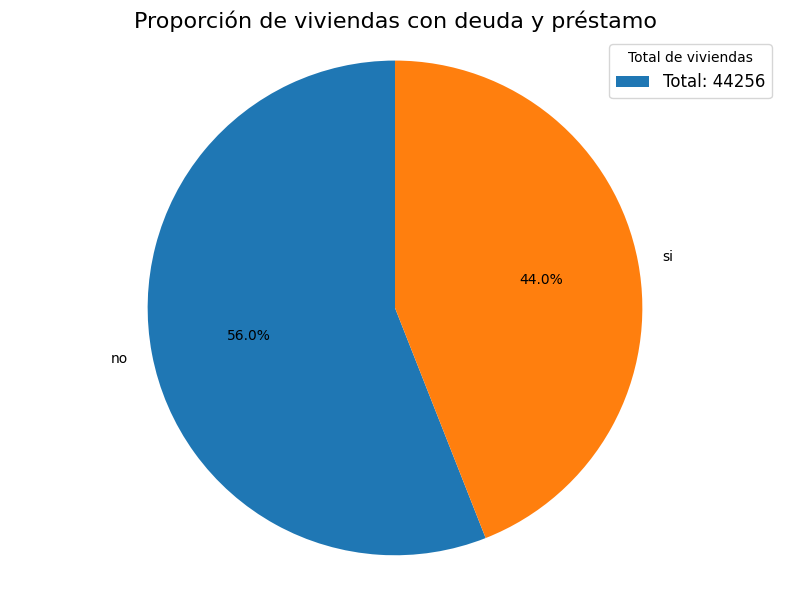